In [15]:
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report,
                             ConfusionMatrixDisplay)

In [16]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Elevvo Internship/Forest Cover Type Classification/covtype.data'

column_names = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
    ] + [f"Wilderness_Area_{i}" for i in range(1, 5)
    ] + [f"Soil_Type_{i}" for i in range(1, 41)] + ["Cover_Type"]
data = pd.read_csv(path, header=None, names=column_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Forest Cover Type Distribution')

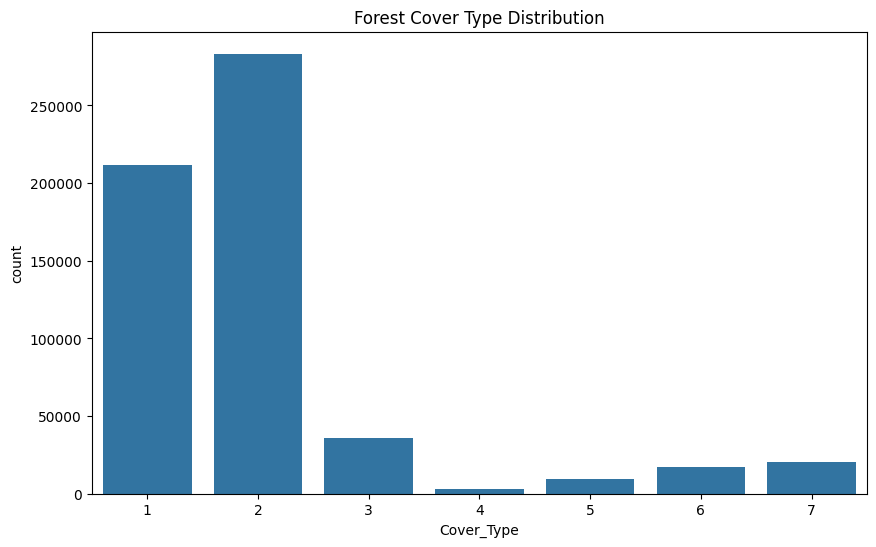

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=data)
plt.title('Forest Cover Type Distribution')

In [18]:
x = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]-1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

numerical_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [19]:
random_forest_model = RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

random_forest_model.fit(x_train, y_train);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


In [20]:
random_forest_yhat = random_forest_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, random_forest_yhat))
print(classification_report(y_test, random_forest_yhat))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.2s



Accuracy: 0.9551388518368716
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.96      0.95      7121
           3       0.91      0.85      0.88       526
           4       0.94      0.77      0.85      1995
           5       0.94      0.90      0.92      3489
           6       0.97      0.96      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.1s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.5s finished


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

<Figure size 1000x800 with 0 Axes>

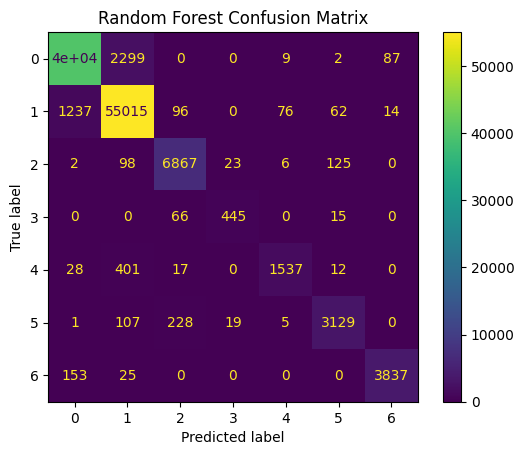

In [21]:
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(random_forest_model, x_test, y_test)
plt.title('Random Forest Confusion Matrix')

Text(0.5, 1.0, 'Top 10 Important Features - Random Forest')

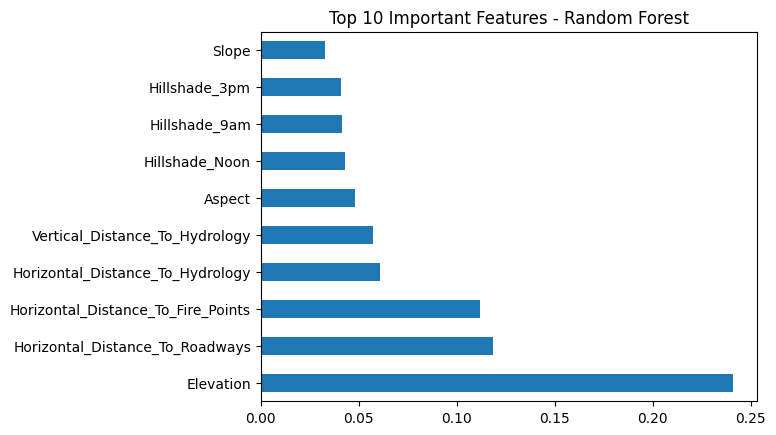

In [22]:
feat_importances = pd.Series(random_forest_model.feature_importances_,
                             index=x.columns)
top_features = feat_importances.nlargest(10)
plt.figure()
top_features.plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest')

In [23]:
xgboost_model = XGBClassifier(verbosity=0, random_state=42, n_jobs=-1,
                              objective='multi:softmax', num_class=7)

xgboost_model.fit(x_train, y_train);

In [24]:
xgboost_yhat = xgboost_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, xgboost_yhat))
print(classification_report(y_test, xgboost_yhat))


Accuracy: 0.8711823274786366
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.91      0.86      0.89       526
           4       0.89      0.59      0.71      1995
           5       0.85      0.82      0.83      3489
           6       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

<Figure size 640x480 with 0 Axes>

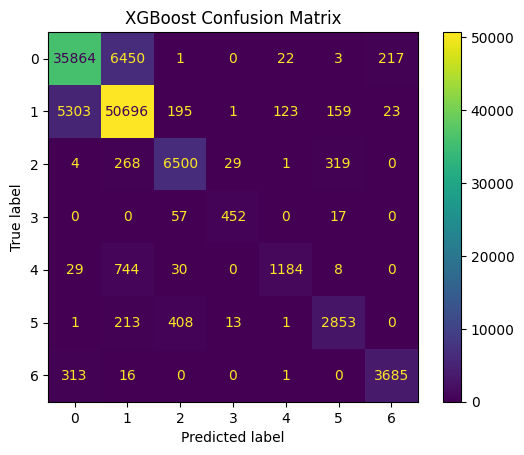

In [25]:
plt.figure()
ConfusionMatrixDisplay.from_estimator(xgboost_model, x_test, y_test)
plt.title('XGBoost Confusion Matrix')

Text(0.5, 1.0, 'Top 10 Important Features - XGBoost')

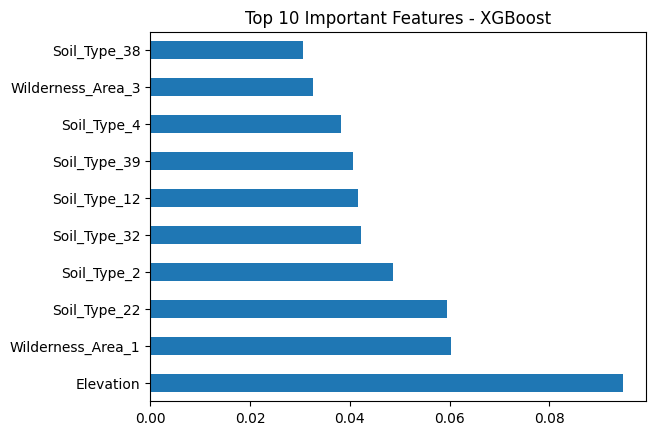

In [26]:
feat_importances_xgb = pd.Series(xgboost_model.feature_importances_, index=x.columns)
top_features_xgb = feat_importances_xgb.nlargest(10)
plt.figure()
top_features_xgb.plot(kind='barh')
plt.title('Top 10 Important Features - XGBoost')

In [27]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, random_forest_yhat):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgboost_yhat):.4f}")

Random Forest Accuracy: 0.9551
XGBoost Accuracy: 0.8712
